In [4]:
# Importing Intialization

import numpy as np 

# Importing qiskit

from qiskit import IBMQ,BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit,execute

# Import basic plot tool

from qiskit.visualization import plot_histogram

In [7]:
# lets start creating balanced oracle

balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# now place X-Gate

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
        
# Use barrier as divider
balanced_oracle.barrier()        

#  Controlled - Not Gates

for qubit in range (n):
    balanced_oracle.cx(qubit,n)
    
# Use barrier as divider

balanced_oracle.barrier()  

# now place X-Gate

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.draw()     

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [13]:
n=3

dj = QuantumCircuit(n+1,n)

# Applying H-Gates

for qubit in range(n):
    dj.h(qubit)
    
dj.x(n)
dj.h(n)

dj += balanced_oracle  

# Repeat H-gates
for qubit in range(n):
    dj.h(qubit)
    
dj.barrier()    
    
# Measure
for i in range(n):
    dj.measure(i, i)    
    

dj.draw()

┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q_0: ┤ H ├┤ X ├─░───■─────────────░─┤ X ├┤ H ├─░─┤M├──────
     ├───┤└───┘ ░   │             ░ ├───┤└───┘ ░ └╥┘┌─┐   
q_1: ┤ H ├──────░───┼────■────────░─┤ H ├──────░──╫─┤M├───
     ├───┤┌───┐ ░   │    │        ░ ├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├┤ H ├─░──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░  ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░────────────░──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░            ░  ║  ║  ║ 
c_0: ═════════════════════════════════════════════╩══╬══╬═
                                                     ║  ║ 
c_1: ════════════════════════════════════════════════╩══╬═
                                                        ║ 
c_2: ═══════════════════════════════════════════════════╩═

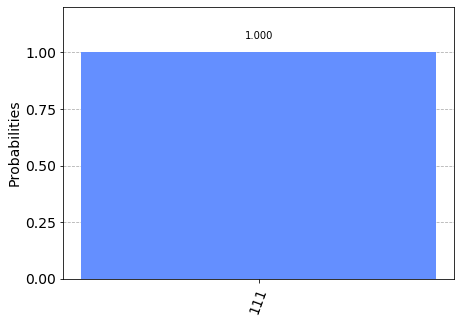

In [14]:
# use local simulator 

backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj , backend=backend , shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)  